# 1. Detector (YOLO vs RF-DETR)

In [1]:
from pathlib import Path
import sys

import yaml

# project setup
project_root = Path("..").resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
from research.src.models.training import DetectorTrainerConfig
from research.src.training.detector import run_detector_training

CONFIG_DIR = Path("../../configs/").resolve()
cfg_path = CONFIG_DIR / "detector_train.yaml"
with open(cfg_path) as f:
    raw_conf = yaml.safe_load(f)
config = DetectorTrainerConfig(**raw_conf)
config

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/home/jakub-ciesko/tools/global-venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


DetectorTrainerConfig(base_model='rtdetr-l.pt', project_name='pepper_thesis_detector_test', dataset_yaml=PosixPath('../../data/out/distilled/data.yaml'), epochs=5, imgsz=640, batch_size=4, device='0', optimizer='auto', lr0=0.0001)

In [15]:
results = run_detector_training(cfg_path)

Ultralytics 8.4.7 🚀 Python-3.12.3 torch-2.9.1+cu130 CUDA:0 (NVIDIA GeForce RTX 5050 Laptop GPU, 7706MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../../data/out/distilled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

[research.src.training.detector|WARNING]ONNX Export failed (You can still use .pt): No module named 'onnx'


In [32]:
results.confusion_matrix.print()

0.0 2.0 0.0 1.0 3.0 321.0
0.0 0.0 0.0 0.0 0.0 9.0
0.0 0.0 0.0 0.0 0.0 545.0
0.0 0.0 0.0 1.0 0.0 16.0
0.0 0.0 0.0 0.0 0.0 2.0
2.0 1.0 2.0 0.0 2.0 0.0


# 2. VLM Qwen

In [3]:
from research.src.models.training import VLMTrainerConfig
from research.src.training.vlm import run_vlm_training

In [4]:
cfg = CONFIG_DIR / "vlm_train.yaml"
with open(cfg) as f:
    raw_conf = yaml.safe_load(f)
config = VLMTrainerConfig(**raw_conf)
config

VLMTrainerConfig(lora=LoRAConfig(r=8, lora_alpha=16, lora_dropout=0.0, bias='none', finetune_vision_layers=True, finetune_language_layers=True, finetune_attention_modules=True, finetune_mlp_modules=True, target_modules=['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj'], use_rslora=False), training=UnslothTrainingConfig(base_model_id='unsloth/Qwen2-VL-2B-Instruct-unsloth-bnb-4bit', output_dir='../../data/out/vlm_test_run', load_in_4bit=True, batch_size=1, gradient_accumulation_steps=1, max_steps=5, learning_rate=0.0002, warmup_steps=1, fp16=False, bf16=True, logging_steps=1, optim='adamw_8bit', seed=42, weight_decay=0.01, lr_scheduler_type='linear', export_quantization='q4_k_m', hf_hub_id='qwen3-vl-8b-som-sgg'), dataset_path=PosixPath('../../data/out/sg/train.jsonl'), system_prompt="You are a robotic scene graph generator. Analyze the provided Set-of-Mark (SoM) image where objects are marked with numerical IDs. Output a JSON list of spatial or other relationsh

In [5]:
run_vlm_training(cfg)

==((====))==  Unsloth 2026.1.4: Fast Qwen2_Vl patching. Transformers: 4.57.1.
   \\   /|    NVIDIA GeForce RTX 5050 Laptop GPU. Num GPUs = 1. Max memory: 7.525 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.1+cu130. CUDA: 12.0. CUDA Toolkit: 13.0. Triton: 3.5.1
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


Unsloth: Making `model.base_model.model.model.visual` require gradients
Unsloth: Model does not have a default image size - using 512


The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 3 | Num Epochs = 2 | Total steps = 5
O^O/ \_/ \    Batch size per device = 1 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (1 x 1 x 1) = 1
 "-____-"     Trainable parameters = 14,475,264 of 2,223,460,864 (0.65% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.844600
2,2.812500
3,2.507600
4,2.351700
5,2.214700


In [7]:
from PIL import Image
from unsloth import FastVisionModel

In [8]:
adapter_path = "../../data/out/vlm_test_run"

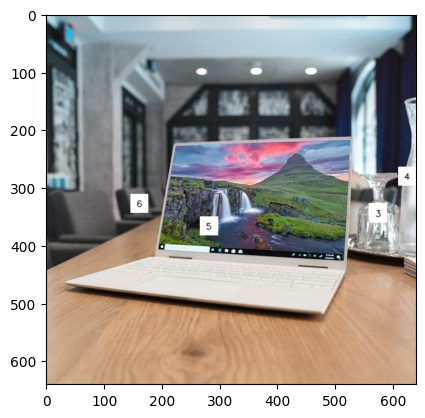

In [18]:
from matplotlib import pyplot as plt

img_path = CONFIG_DIR.parent / "data/out/sg/som_images/som_office1.jpg"
img = Image.open(img_path)
plt.imshow(img)

In [15]:
model, tokenizer = FastVisionModel.from_pretrained(
    adapter_path,
    load_in_4bit=True,
    use_gradient_checkpointing=False,
)

==((====))==  Unsloth 2026.1.4: Fast Qwen2_Vl patching. Transformers: 4.57.1.
   \\   /|    NVIDIA GeForce RTX 5050 Laptop GPU. Num GPUs = 1. Max memory: 7.525 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.1+cu130. CUDA: 12.0. CUDA Toolkit: 13.0. Triton: 3.5.1
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [16]:
FastVisionModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (model): Qwen2VLModel(
        (visual): Qwen2VisionTransformerPretrainedModel(
          (patch_embed): PatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-26): 27 x Qwen2VLVisionBlock(
              (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (attn): VisionAttention(
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1280, out_features=8, bias=False

In [17]:
system_prompt = config.system_prompt

In [19]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": img_path},
            {"type": "text", "text": system_prompt}
        ]
    }
]

In [21]:
input_text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
)
inputs = tokenizer(
    images=[img],
    text=[input_text],
    padding=True,
    return_tensors="pt",
).to("cuda")

In [28]:
outputs = model.generate(
    **inputs,
    max_new_tokens=200,
    use_cache=True,
    temperature=0.01,
    do_sample=True,
    top_p=1.0
)

In [29]:
response_text = tokenizer.batch_decode(
    outputs[:, inputs.input_ids.shape[1]:],
    skip_special_tokens=True
)[0]
print(response_text)

[{'sub': '1', 'rel': 'on', 'obj': '2'}, {'sub': '2', 'rel': 'displayed', 'obj': '3'}, {'sub': '3', 'rel': 'in', 'obj': '4'}, {'sub': '4', 'rel': 'in', 'obj': '5'}, {'sub': '5', 'rel': 'in', 'obj': '6'}]


**works but not great (need better model, and better training. prompts do not match)**